# Práctica 2
## Apartado 1: Visualización

### Pilar Navarro Ramírez

In [107]:
import pandas as pd

Leemos el fichero con los datos que vamos a estudiar, indicado que los valores con '?' son valores perdidos

In [57]:
raw_data=pd.read_csv("mamografias.csv",na_values=["?"])

In [58]:
raw_data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,L,5.0,3.0,maligno
1,4.0,43.0,R,1.0,NaN,maligno
2,5.0,58.0,I,5.0,3.0,maligno
3,4.0,28.0,R,1.0,3.0,benigno
4,5.0,74.0,R,5.0,NaN,maligno


In [59]:
raw_data.columns = [col.lower() for col in raw_data]

## 1. Preprocesamiento de los Datos

Transformamos los atributos de tipo cadena en valores numéricos. En este caso sería shape.  

In [60]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

numeric_data=raw_data.copy()

numeric_data['shape']=le.fit_transform(raw_data['shape'])

In [61]:
numeric_data.head()

,bi-rads,age,shape,margin,density,severity
0,5.0,67.0,1,5.0,3.0,maligno
1,4.0,43.0,4,1.0,NaN,maligno
2,5.0,58.0,0,5.0,3.0,maligno
3,4.0,28.0,4,1.0,3.0,benigno
4,5.0,74.0,4,5.0,NaN,maligno


Eliminamos ahora las filas que tengan valores perdidos.

In [62]:
less_data=numeric_data.copy()
less_data=less_data.dropna()

Finalmente, seleccionamos el atributo que queremos predecir(target) y separarlo del resto de atributos, los cuales usaremos para predecir dicho atributo (en nuestro caso sería 'severity').

In [63]:
def splitData(data):
    cols = [col for col in data.columns if col not in ['severity']]    
    return data[cols], data['severity']
   
less_attributes,less_target=splitData(less_data)

## 2. Curva Roc de todos los modelos

In [64]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

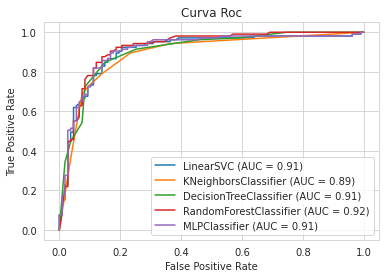

In [65]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(less_attributes, less_target, random_state=10)

svc=LinearSVC(C=5,class_weight='balanced',random_state=10,max_iter=100000000)
svc.fit(x_train, y_train)

knn=KNeighborsClassifier(n_neighbors=7, weights='uniform', p=2,metric='hamming')
knn.fit(x_train, y_train)

tree=DecisionTreeClassifier(criterion='entropy', min_samples_split=2,min_samples_leaf=50,random_state=100)
tree.fit(x_train, y_train)

forest=RandomForestClassifier(n_estimators=150, criterion='entropy',min_samples_split=2,min_samples_leaf=50,random_state=100)
forest.fit(x_train, y_train)

nn=MLPClassifier(hidden_layer_sizes=(10,20,10), activation='relu',solver='lbfgs',alpha=0.001, max_iter=10000,random_state=100)
nn.fit(x_train, y_train)

ax = plt.gca(title="Curva Roc")

for model in [svc,knn,tree,forest,nn]:
    plot_roc_curve(model, x_test, y_test, ax=ax) 
plt.savefig('curva_roc.png',dpi=300)

## 3. Medidas del preprocesamiento

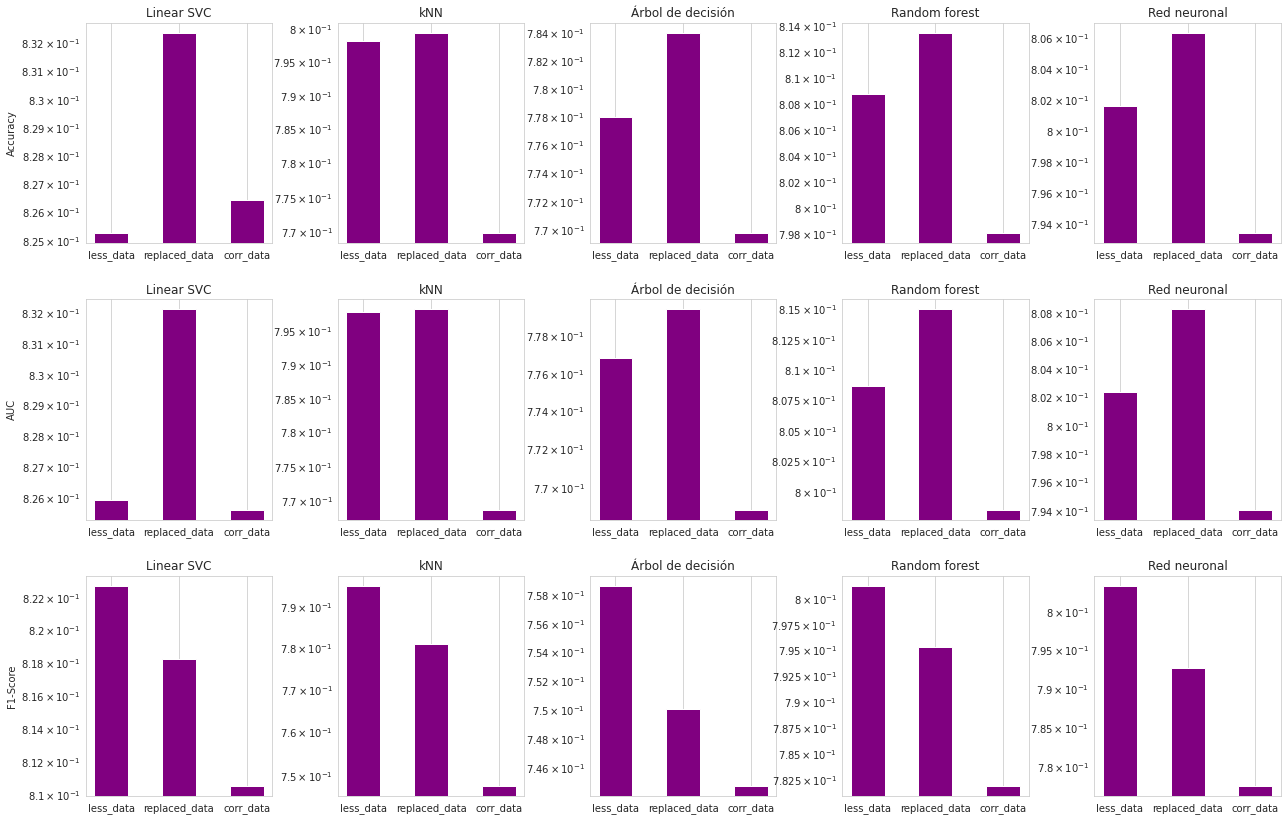

In [66]:
accuracy=pd.read_csv("accuracy.csv")
auc=pd.read_csv("auc.csv")
f1_score=pd.read_csv("f1.csv")

medidas=[pd.read_csv("accuracy.csv"),pd.read_csv("auc.csv"),pd.read_csv("f1.csv")]

fig, axs= plt.subplots(3, 5,figsize=(18,12))
fig.tight_layout(pad=3.5)

for j in range(len(medidas)):
    for i in range(1,len(axs[0])+1):
        axs[j,i-1].bar(["less_data","replaced_data","corr_data"],medidas[j][medidas[j].columns[i]],width=0.5,color='purple',log=True)
        axs[j,i-1].set_title(medidas[j].columns[i])
axs[0,0].set(ylabel="Accuracy")
axs[1,0].set(ylabel="AUC")
axs[2,0].set(ylabel="F1-Score")

plt.savefig('preprocesamiento.png',dpi=300,bbox_inches='tight')

## 4. Análisis de atributos

In [67]:
data=numeric_data.copy()

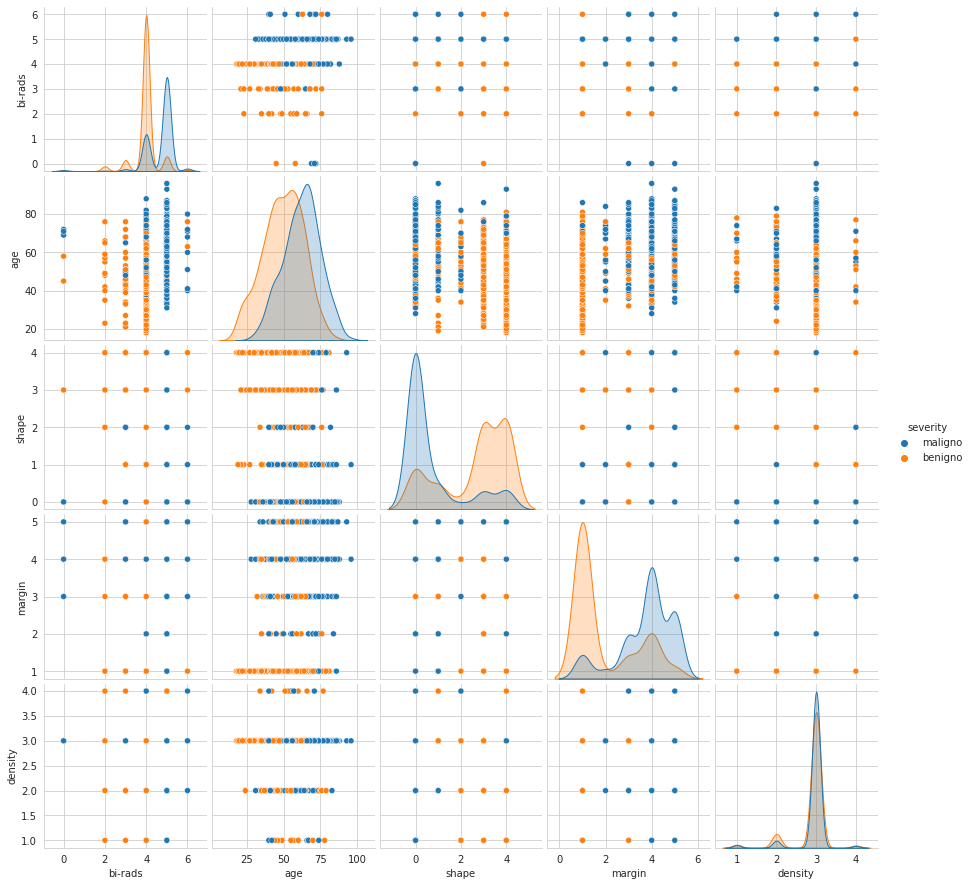

In [68]:
sns.pairplot(data,hue='severity')

### Diagramas de cajas

<AxesSubplot:xlabel='severity', ylabel='bi-rads'>

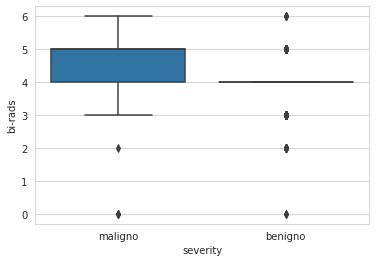

In [161]:
sns.boxplot(data=data,y='bi-rads',x='severity')

<AxesSubplot:xlabel='severity', ylabel='age'>

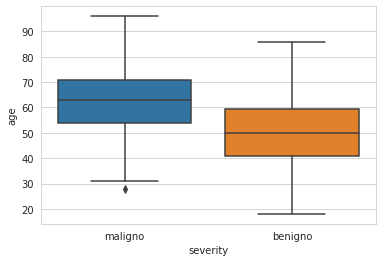

In [162]:
sns.boxplot(data=data,y='age',x='severity')

<AxesSubplot:xlabel='severity', ylabel='density'>

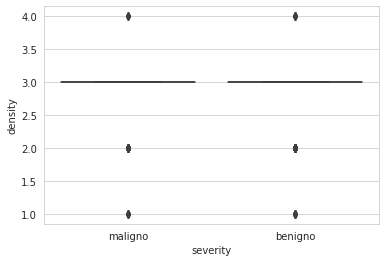

In [163]:
sns.boxplot(data=data,y='density',x='severity')

<AxesSubplot:xlabel='severity', ylabel='margin'>

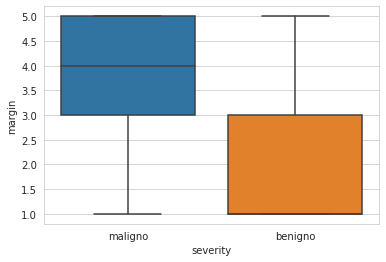

In [164]:
sns.boxplot(data=data,y='margin',x='severity')

<AxesSubplot:xlabel='severity', ylabel='shape'>

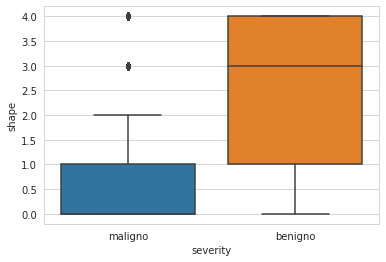

In [165]:
sns.boxplot(data=data,y='shape',x='severity')

### Diagramas de barras

In [101]:
#Convertimos la edad a valores categóricos y luego estas categorías a números

new_data= data.copy()
new_data['age_cat'] = pd.cut(new_data['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=["0-20", "20-30", "30-40", "40-50","50-60","60-70","70-80", "80-90","90-100"])
new_data = new_data.drop('age',axis = 1)

new_data['age_cat'] = new_data.age_cat.astype(str)
le=preprocessing.LabelEncoder()

new_data['age_cat']=le.fit_transform(new_data['age_cat'])
column_names=['bi-rads','shape','margin','density','age_cat','severity']
new_data = new_data.reindex(columns=column_names)

In [102]:
malignos=[[] for i in range(len(new_data.columns)-1)]
benignos=[[] for i in range(len(new_data.columns)-1)]
condition2=new_data['severity']=='maligno'
condition3=new_data['severity']=='benigno'
for j in range(len(new_data.columns)-1):
    for i in range(len(new_data[new_data.columns[j]].unique())):
        condition1=new_data[new_data.columns[j]]==i
        condition=condition1 & condition2
        malignos[j].append(new_data[condition].shape[0])
        condition=condition1 & condition3
        benignos[j].append(new_data[condition].shape[0])

In [103]:
malignos

[[3, 0, 1, 6, 120, 306, 8],
 [315, 45, 12, 35, 38],
 [0, 41, 15, 73, 191, 114],
 [0, 7, 18, 393, 5],
 [0, 1, 20, 59, 109, 135, 91, 23, 2, 5]]

In [104]:
benignos

[[2, 0, 13, 30, 427, 40, 3],
 [85, 50, 19, 176, 186],
 [0, 316, 9, 43, 89, 22],
 [0, 9, 41, 405, 7],
 [6, 41, 82, 131, 141, 87, 25, 3, 0, 0]]

In [105]:
visualizar=[]
for i in range(len(malignos)):
    visualizar.append(pd.DataFrame({"maligno":malignos[i],"benigno":benignos[i]}))

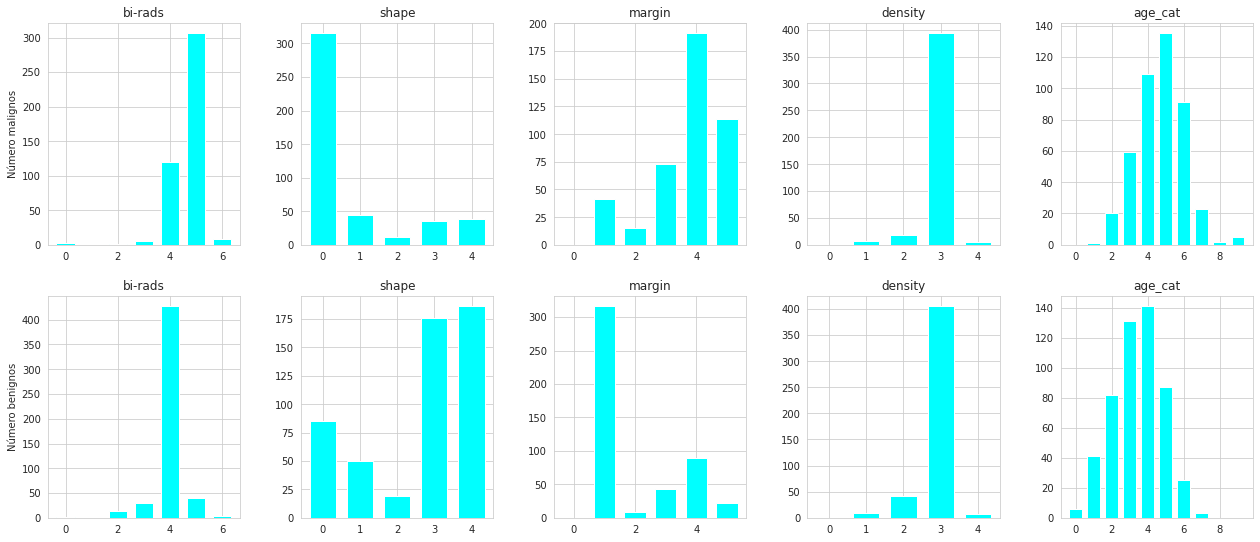

In [106]:
fig, axs= plt.subplots(2, 5,figsize=(18,8))
fig.tight_layout(pad=3)

for j in range(2):
    for i in range(len(axs[0])):
        axs[j,i].bar(visualizar[i].index,visualizar[i][visualizar[i].columns[j]],width=0.7,color='aqua')
        axs[j,i].set_title(new_data.columns[i])
axs[0,0].set(ylabel="Número malignos")
axs[1,0].set(ylabel="Número benignos")

plt.savefig('analisis.png',dpi=300,bbox_inches='tight')